In [1]:
import numpy as np
from math import *
import matplotlib.pylab as plt
import pandas as pd
from pathlib import Path
import matplotlib.colors
import seaborn as sns
from pathlib import Path
import os
import shutil
import imageio

In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as font_manager
%matplotlib inline
csfont = {'fontname':'Times New Roman'}

In [3]:
path = Path(r'/Users/maryiakalinina/Desktop/DATA_INDIA#2.xlsx')
df_ues = pd.read_excel(path , sheet_name='CLTE', skiprows=0)
df_ues.head(4)
# features = ["Field", "Porosity", "Permeability", "K_Permeability", "Density", \
#             "Min Density", "TC par avg", " TC perp avg", "Anisotropy Coefficient", "VHC", "HC par", "HC perp"]

,T basalt,CLTE basalt,T clay,CLTE clay,T gabbro,CLTE gabbro,Q1,T Q1,C Q1,Q2,...,C Q2,Q3,T Q3,C Q3,Q4,T Q4,C Q4,QF,T QF,C QF
0,30.126667,6.118363,30.133333,8.382814,30.120000,6.278932,5.0,30.053333,9.808515,36.0,...,NaN,10.0,30.113333,9.952793,18.0,30.113333,8.045263,33.0,30.093333,9.636711
1,40.426667,6.375894,40.333333,8.377952,40.306667,6.417711,NaN,40.293333,10.089527,NaN,...,10.455180,NaN,40.426667,10.142244,NaN,40.433333,8.307823,NaN,40.446667,9.656849
2,50.733333,6.494347,50.806667,8.387261,50.686667,6.495582,NaN,50.600000,10.239356,NaN,...,10.440375,NaN,50.733333,10.216692,NaN,50.786667,8.381822,NaN,50.746667,9.653411
3,60.943333,6.579097,60.720000,8.408233,60.673333,6.597879,NaN,60.966667,10.378301,NaN,...,10.369480,NaN,61.020000,10.271626,NaN,60.740000,8.541400,NaN,61.186667,9.627216


In [4]:
df_ues.describe().loc[['mean', 'std', 'min', 'max']].apply(lambda x: np.round(x, 2))

,T basalt,CLTE basalt,T clay,CLTE clay,T gabbro,CLTE gabbro,Q1,T Q1,C Q1,Q2,...,C Q2,Q3,T Q3,C Q3,Q4,T Q4,C Q4,QF,T QF,C QF
mean,65.89,6.59,65.94,8.39,65.74,6.66,5.50,65.74,10.48,41.50,...,10.55,10.0,65.75,10.31,20.00,65.91,9.30,47.0,67.56,9.94
std,24.88,0.26,25.00,0.02,24.82,0.26,0.71,23.92,0.37,7.78,...,0.24,NaN,24.75,0.21,2.83,24.08,0.76,19.8,23.88,0.40
min,30.13,6.12,30.13,8.37,30.12,6.28,5.00,30.05,9.81,36.00,...,10.19,10.0,30.11,9.95,18.00,30.10,8.05,33.0,30.09,9.52
max,101.13,6.89,101.47,8.42,101.16,7.02,6.00,100.88,11.04,47.00,...,10.99,10.0,100.83,10.61,22.00,101.41,10.30,61.0,101.69,10.60


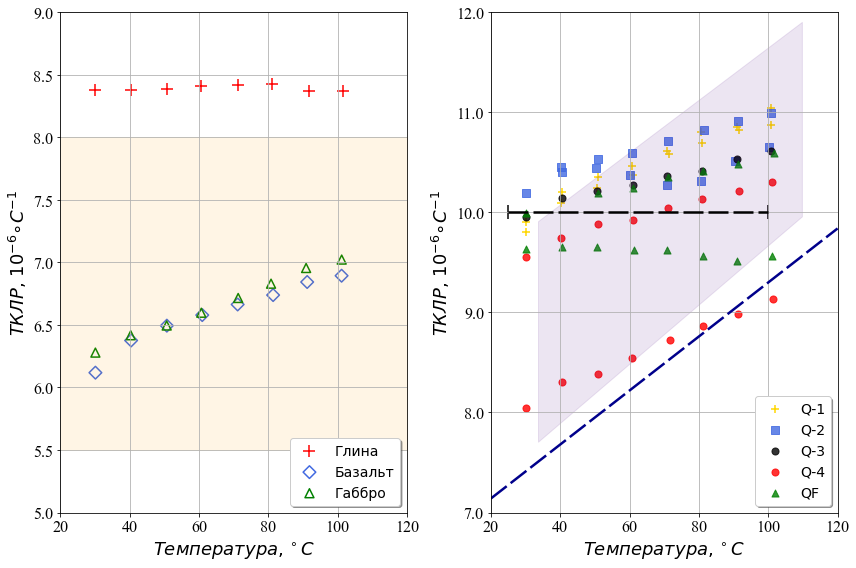

In [5]:
fig = plt.figure(constrained_layout=False, figsize=(12, 8))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 2,  sharex=False)



ticks_size, label_size = 16, 18


  ### INPUT DATA
axs[0].scatter(df_ues["T clay"], df_ues["CLTE clay"], marker="+", label='Глина', 
              s=140, color='red', lw=1.5) 
axs[0].scatter(df_ues["T basalt"], df_ues["CLTE basalt"],marker="D", label='Базальт', 
               s=80, facecolors='none', edgecolors='royalblue', lw=1.5)
axs[0].scatter(df_ues["T gabbro"], df_ues["CLTE gabbro"],marker="^", label='Габбро',
              s=80, facecolors='none', edgecolors='green', lw=1.5)

axs[0].set_xscale("linear")
axs[0].set_xlabel("${Температура,}^\circ C$", fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_xlim([20, 120])
axs[0].set_xticks(np.arange(20, 121, 20))
axs[0].set_xticklabels(np.arange(20, 121, 20), fontsize=ticks_size, **csfont)
# axs[0].set_yscale()
axs[0].grid(which='major', axis='both', linestyle='-')

axs[0].set_ylabel('$ТКЛР{(\alpha)}$' + ', ' +'${10}^{-6}{\circ C}^{-1}$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_ylim([5, 9])
axs[0].set_yticks(np.arange(5, 9.1, 0.5))
axs[0].set_yticklabels(np.arange(5, 9.1, 0.5), fontsize=ticks_size, **csfont)

axs[0].fill_between([20, 120], [5.5, 5.5], [8.0, 8.0], alpha=0.1, 
                             color='orange')

axs[0].legend(loc='lower right',
          fancybox=True, shadow=True, ncol=1, fontsize=14)

        

size = 50 
axs[1].scatter(df_ues["T Q1"], df_ues["C Q1"], marker="+", label='Q-1', 
              s=size, color='gold') 
axs[1].scatter(df_ues["T Q2"], df_ues["C Q2"],marker="s", label='Q-2', 
               s=size, color='RoyalBlue', alpha=0.8)

axs[1].scatter(df_ues["T Q3"], df_ues["C Q3"],marker="o", label='Q-3',
              s=size, color='black', alpha=0.8)

axs[1].scatter(df_ues["T Q4"], df_ues["C Q4"],marker="o", label='Q-4',
              s=size, color='red', alpha=0.8)

axs[1].scatter(df_ues["T QF"], df_ues["C QF"],marker="^", label='QF',
              s=size, color='Green', alpha=0.8)

axs[1].grid(which='major', axis='both', linestyle='-')

axs[1].set_xscale("linear")
axs[1].set_xlabel("${Температура,}^\circ C$", fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_xlim([20, 120])
axs[1].set_xticks(np.arange(20, 121, 20))
axs[1].set_xticklabels(np.arange(20, 121, 20), fontsize=ticks_size, **csfont)
# axs[0].set_yscale()
axs[1].grid(which='major', axis='both', linestyle='-')

axs[1].set_ylabel('$ТКЛР{(\alpha)}$' + ', ' +'${10}^{-6}{\circ C}^{-1}$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_ylim([7, 12.0])
axs[1].set_yticks(np.arange(7, 12.1, 1.0))
axs[1].set_yticklabels(np.arange(7, 12.1, 1.0), fontsize=ticks_size, **csfont)

axs[1].legend(loc='lower right',
              fancybox=True, shadow=True, ncol=1, fontsize=14)

def em_eq(t):
    return 6.6+0.027*t
    

x_em = np.linspace(20, 120, 50)
axs[1].plot(x_em, em_eq(x_em), 
                     dashes=[8, 2],
            color='DarkBlue',
           label="Chekhonin et.al., 2021", lw=2.5)

axs[1].plot([25, 100], [10, 10],
           dashes=[8, 2],
            color='Black',
           label="Robertson et.al., 1988",
           lw=2.5)

axs[1].scatter([25, 100], [10, 10], marker="|", color='black', s=200)

x = [33.58208955, 109.7014925]
lower = [7.707509881, 9.960474308]
upper = [9.913043478, 11.90513834]
axs[1].fill_between(x, lower, upper, alpha=0.1, 
                    label=f'Miklashevsk et.al, 2007', 
                    color='indigo')

plt.tight_layout()
# plt.savefig('india#2_por_VS_permf.jpg', dpi=300, bbox_inches='tight')

plt.show()

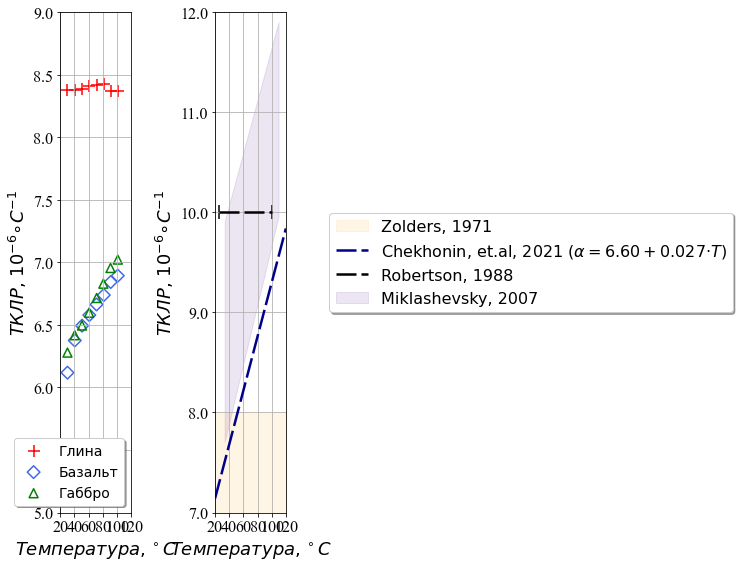

In [7]:
fig = plt.figure(constrained_layout=False, figsize=(12, 8))
# fig.tight_layout(pad=0.001000)
axs = fig.subplots(1, 2,  sharex=False)



ticks_size, label_size = 16, 18


  ### INPUT DATA
axs[0].scatter(df_ues["T clay"], df_ues["CLTE clay"], marker="+", label='Глина', 
              s=140, color='red', lw=1.5) 
axs[0].scatter(df_ues["T basalt"], df_ues["CLTE basalt"],marker="D", label='Базальт', 
               s=80, facecolors='none', edgecolors='royalblue', lw=1.5)
axs[0].scatter(df_ues["T gabbro"], df_ues["CLTE gabbro"],marker="^", label='Габбро',
              s=80, facecolors='none', edgecolors='green', lw=1.5)

axs[0].set_xscale("linear")
axs[0].set_xlabel("${Температура,}^\circ C$", fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_xlim([20, 120])
axs[0].set_xticks(np.arange(20, 121, 20))
axs[0].set_xticklabels(np.arange(20, 121, 20), fontsize=ticks_size, **csfont)
# axs[0].set_yscale()
axs[0].grid(which='major', axis='both', linestyle='-')

axs[0].set_ylabel('$ТКЛР{(\alpha)}$' + ', ' +'${10}^{-6}{\circ C}^{-1}$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[0].set_ylim([5, 9])
axs[0].set_yticks(np.arange(5, 9.1, 0.5))
axs[0].set_yticklabels(np.arange(5, 9.1, 0.5), fontsize=ticks_size, **csfont)

axs[1].fill_between([20, 120], [5.5, 5.5], [8.0, 8.0], alpha=0.1, 
                             color='orange', label=f'Zolders, 1971')

axs[0].legend(loc='lower right',
          fancybox=True, shadow=True, ncol=1, fontsize=14)

        

size = 50 

axs[1].grid(which='major', axis='both', linestyle='-')

axs[1].set_xscale("linear")
axs[1].set_xlabel("${Температура,}^\circ C$", fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_xlim([20, 120])
axs[1].set_xticks(np.arange(20, 121, 20))
axs[1].set_xticklabels(np.arange(20, 121, 20), fontsize=ticks_size, **csfont)
# axs[0].set_yscale()
axs[1].grid(which='major', axis='both', linestyle='-')

axs[1].set_ylabel('$ТКЛР{(\alpha)}$' + ', ' +'${10}^{-6}{\circ C}^{-1}$', 
                  fontsize=label_size, **csfont, fontweight='bold')
axs[1].set_ylim([7, 12.0])
axs[1].set_yticks(np.arange(7, 12.1, 1.0))
axs[1].set_yticklabels(np.arange(7, 12.1, 1.0), fontsize=ticks_size, **csfont)

def em_eq(t):
    return 6.6+0.027*t
    

x_em = np.linspace(20, 120, 50)
axs[1].plot(x_em, em_eq(x_em), 
                     dashes=[8, 2],
            color='DarkBlue',
           label="Chekhonin, et.al, 2021 " + "$(α=6.60+0.027⋅T)$", lw=2.5)

axs[1].plot([25, 100], [10, 10],
           dashes=[8, 2],
            color='Black',
           label="Robertson, 1988", lw=2.5)

axs[1].scatter([25, 100], [10, 10], marker="|", color='black', s=200)

x = [33.58208955, 109.7014925]
lower = [7.707509881, 9.960474308]
upper = [9.913043478, 11.90513834]
axs[1].fill_between(x, lower, upper, alpha=0.1, 
                    label=f'Miklashevsky, 2007', 
                    color='indigo')



# axs[1].legend(loc='lower right',
#           fancybox=True, shadow=True, ncol=1, fontsize=14)

axs[1].legend( 
                    loc='center left',
                     fancybox=True, shadow=True, ncol=1,
                     fontsize=16,
                    bbox_to_anchor=(1.5, 0.5)
                    )


plt.tight_layout()
# plt.savefig('india#2_por_VS_permf.jpg', dpi=300, bbox_inches='tight')

plt.show()